In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [186]:
train_messy = "../images/train/messy"
train_clean= "../images/train/clean"
test_messy= "../images/val/messy"
test_clean= "../images/val/clean"

In [187]:
def train_data():
    train_data_messy = [] 
    train_data_clean = []
    for image1 in tqdm(os.listdir(train_messy)): 
        path = os.path.join(train_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (128, 128))
        train_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(train_clean)): 
        path = os.path.join(train_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (128, 128))
        train_data_clean.append(img2) 
    
    train_data = np.concatenate((np.asarray(train_data_messy),np.asarray(train_data_clean)),axis=0)
    return train_data

In [188]:
def test_data():
    test_data_messy = [] 
    test_data_clean=[]
    for image1 in tqdm(os.listdir(test_messy)): 
        path = os.path.join(test_messy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (128, 128))
        test_data_messy.append(img1) 
    for image2 in tqdm(os.listdir(test_clean)): 
        path = os.path.join(test_clean, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (128, 128))
        test_data_clean.append(img2) 
    
    test_data= np.concatenate((np.asarray(test_data_messy),np.asarray(test_data_clean)),axis=0) 
    return test_data

In [189]:
train_data = train_data() 
test_data = test_data()

100%|██████████| 10/10 [00:00<00:00, 50.04it/s]


In [190]:
X = np.concatenate((train_data,test_data),axis=0)
X = (X-np.min(X))/(np.max(X)-np.min(X))

In [191]:
z1 = np.zeros(96)
o1 = np.ones(96)
y_train = np.concatenate((o1, z1), axis=0)
z = np.zeros(10)
o = np.ones(10)
y_test = np.concatenate((o, z), axis=0)

y = np.concatenate((y_train,y_test),axis=0)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [193]:
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

X_train = X_train.reshape(number_of_train, X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(number_of_test, X_test.shape[1] * X_test.shape[2])

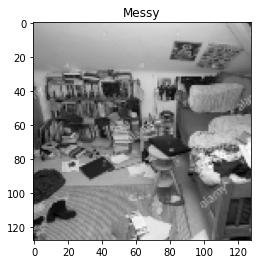

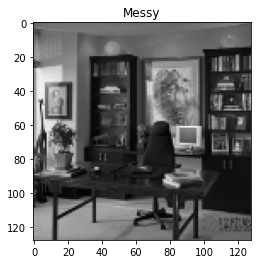

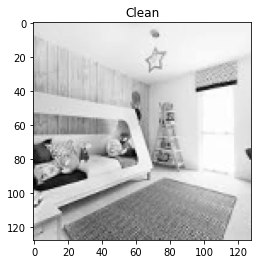

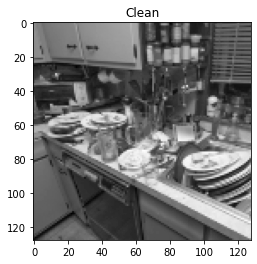

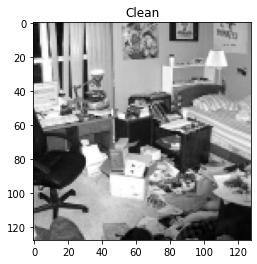

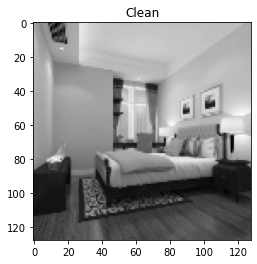

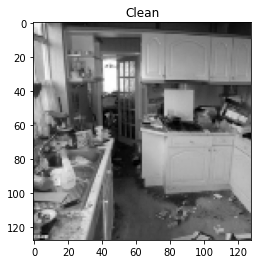

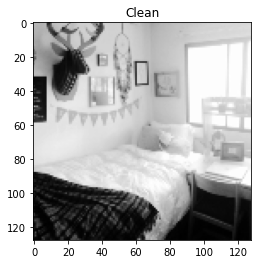

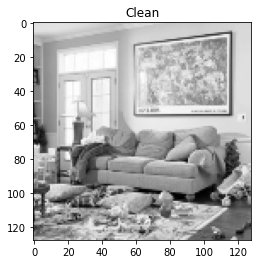

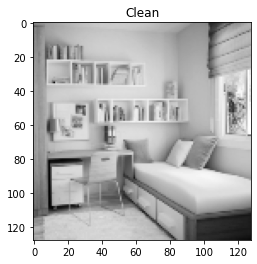

In [194]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

ans = model.predict(X_test[:10])
ans = list(map(lambda x: "Messy" if x else "Clean", ans))

for i in range(len(ans)):
    plt.imshow(X_test[i].reshape(128, 128), cmap='gray')
    plt.title(ans[i])
    plt.show()

In [195]:
model.score(X_test, y_test)

0.59375

In [196]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((180, 16384), (180,), (32, 16384), (32,))